<h2> 1. How are coefficients affected ?</h2>

In [1]:
from sklearn.datasets import load_diabetes

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
data = load_diabetes()    

In [3]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['TARGET'] = data.target

In [4]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,TARGET
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [5]:
df.shape

(442, 11)

In [6]:
# call for train_test_split model

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=2)   

In [7]:
# Now, call for 'Ridge_Regression'
    
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score 

In [8]:
# Now, apply 'Ridge_Regression' for 4 values of 'alpha'

coefs = []
r2_scores = []

for i in [0,10,100,1000]:

    reg = Ridge(alpha=i)
    reg.fit(X_train,y_train)

    # And, hr baar jo coefficients ka values tha usko hmlg store krte chle gye 
    coefs.append(reg.coef_.tolist())
    y_pred = reg.predict(X_test)
    r2_scores.append(r2_score(y_test,y_pred))

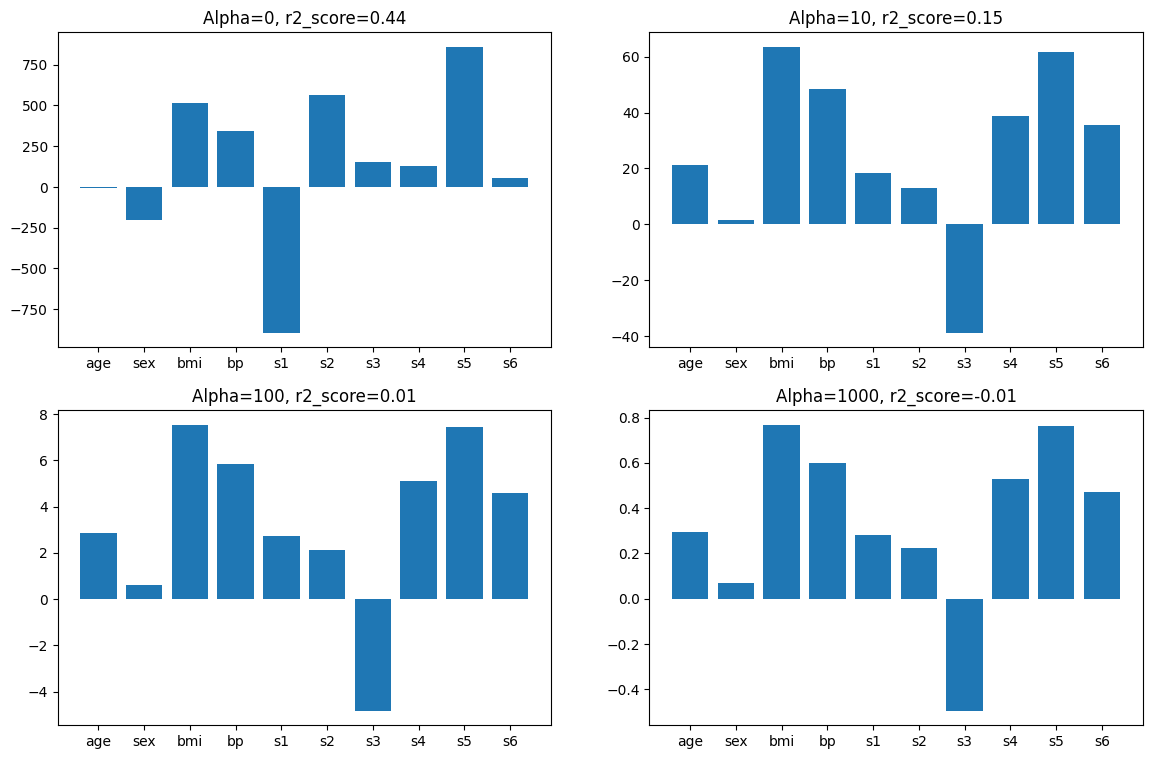

In [9]:
# let's visualize it through the graph :- 

plt.figure(figsize=(14,9))

plt.subplot(221)
plt.bar(data.feature_names, coefs[0])
plt.title('Alpha=0, r2_score={}'.format(round(r2_scores[0],2)))

plt.subplot(222)
plt.bar(data.feature_names, coefs[1])
plt.title('Alpha=10, r2_score={}'.format(round(r2_scores[1],2)))

plt.subplot(223)
plt.bar(data.feature_names, coefs[2])
plt.title('Alpha=100, r2_score={}'.format(round(r2_scores[2],2)))

plt.subplot(224)
plt.bar(data.feature_names, coefs[3])
plt.title('Alpha=1000, r2_score={}'.format(round(r2_scores[3],2)))

plt.show()


# At 'alpha=0', coefficients abhi [-750, 750] ke range mein hai.
# At 'alpha=10', coefficients ab [-40, 60] ke range mein aa gya.
# At 'alpha=100', coefficients ab [-4, 8] ke range mein aa gya.
# At 'alpha=1000', coefficients ab [-0.4, 0.8] ke range mein aa gya.

# that means A/c to our graph,On increasing the values of 'alpha', coefficients start shrinking..
# And, their's value become very close to zero, butnever equal to zero.

<h2> 2. Higher coefficients are affected more</h2>

In [10]:
alphas = [0,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

coefs = []

for i in alphas:

    reg = Ridge(alpha=i)
    reg.fit(X_train,y_train)

    coefs.append(reg.coef_.tolist())

In [11]:
input_array = np.array(coefs)

In [12]:
coef_df = pd.DataFrame(input_array, columns = data.feature_names)
coef_df['alpha'] = alphas
coef_df.set_index('alpha')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
alpha,,,,,,,,,,
0.0000,-9.158653,-205.454322,516.693745,340.619999,-895.552002,561.220679,153.893110,126.731397,861.127002,52.421122
0.0001,-9.116119,-205.329219,516.889664,340.549436,-883.423872,551.559582,148.587063,125.353015,856.485935,52.468916
0.0010,-8.761487,-204.313404,518.380608,339.967926,-787.700510,475.282181,106.795253,114.629265,819.745723,52.873349
0.0100,-6.399507,-198.662945,522.056516,336.340595,-383.717571,152.670882,-66.053243,75.608209,659.875219,55.829221
0.1000,6.643733,-172.237474,485.529585,314.675846,-72.940209,-80.588688,-174.463527,83.614710,484.365316,73.585091
1.0000,42.242528,-57.304483,282.172125,198.059395,14.363734,-22.551079,-136.929684,102.023069,260.104294,98.552692
10.0000,21.174024,1.659837,63.659826,48.492858,18.421510,12.875466,-38.915435,38.842475,61.612302,35.505383
100.0000,2.858980,0.629453,7.540605,5.849949,2.710879,2.142135,-4.834047,5.108223,7.448451,4.576129
1000.0000,0.295726,0.069290,0.769004,0.597824,0.282900,0.225936,-0.495607,0.527031,0.761496,0.471029


In [13]:
# jiska coefficient jyada hai, wo bhut teji se decrease krega w.r.t jiska coefficient utna bda nhi hai

# let's visulaize it through the graph

In [14]:
alphas = [0,0.0001,0.0005,0.001,0.005,0.1,0.5,1,5,10]

coefs = []

for i in alphas:

    reg = Ridge(alpha=i)
    reg.fit(X_train,y_train)

    coefs.append(reg.coef_.tolist())

In [15]:
input_array = np.array(coefs).T 

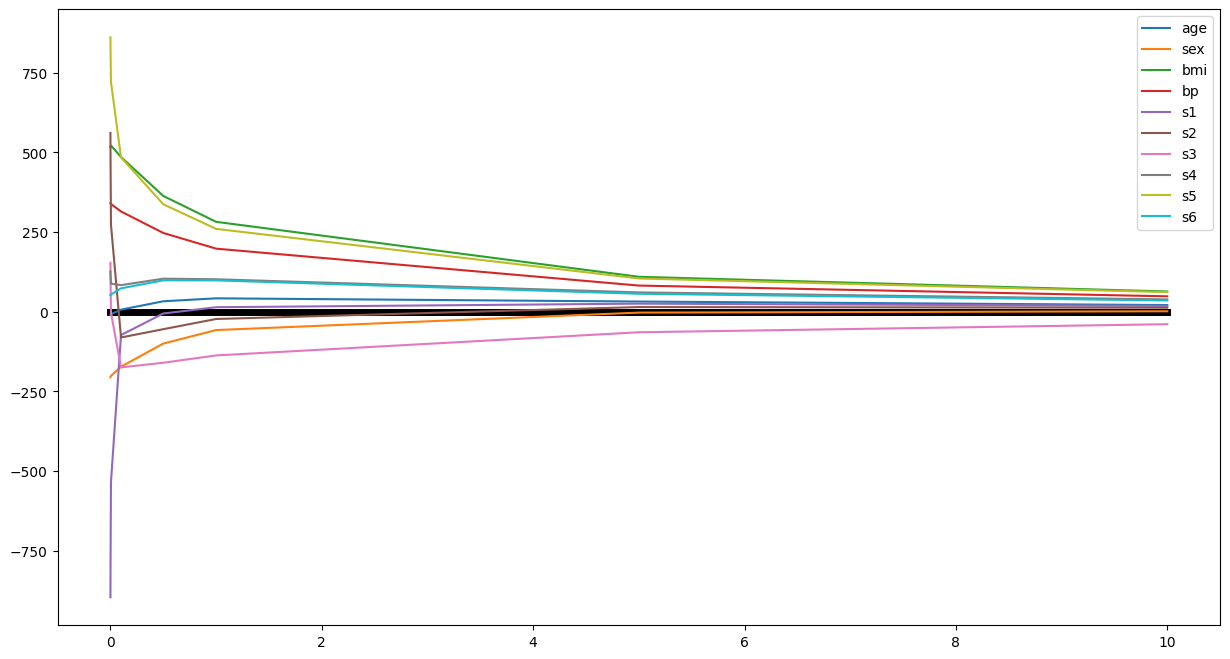

In [16]:
plt.figure(figsize=(15,8))

plt.plot(alphas, np.zeros(len(alphas)), color='black', linewidth=5)

for i in range(input_array.shape[0]):

    plt.plot(alphas, input_array[i], label = data.feature_names[i])

plt.legend()    

# "black_solid_line" denotes coefficient ka "zero" wala line. 

# so,jaise-jaise hm 'alpha' ki value bda rhe hai, coefficients bhut teji se niche girta hai,and becomes tends to zero...

<h2>3. Impact on Bias and Variance</h2>

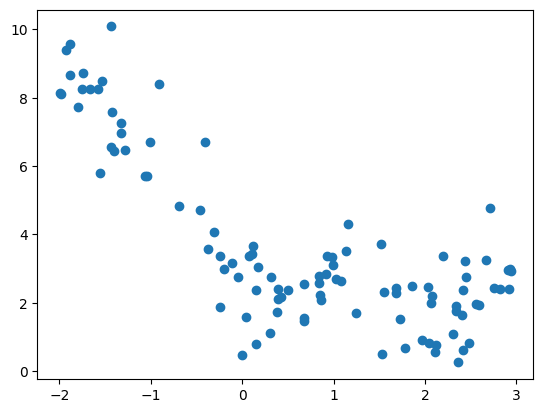

In [17]:
m = 100
X = 5 * np.random.rand(m, 1) - 2
y = 0.7 * X ** 2 - 2 * X + 3 + np.random.randn(m, 1)

plt.scatter(X, y)
plt.show()

In [18]:
# Again, apply for train_test_split method

X_train,X_test,y_train,y_test = train_test_split(X.reshape(100,1),y.reshape(100),test_size=0.2,random_state=2)

In [19]:
import sys
!{sys.executable} -m pip install mlxtend


In [20]:
import mlxtend
print(mlxtend.__version__)

0.23.4


In [21]:
# Now, use 'polynomial_Regression' for this

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=15)

X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

In [22]:
# Now, we will use this library(mlxtend) to calculate 'bias_and_variance' 

from mlxtend.evaluate import bias_variance_decomp
     # yeh fxn kisi bhi particular 'lambda' value k liye,'bias_and_variance' calculate krke dega. 

alphas = np.linspace(0,30,100)

loss = []
bias = []
variance = []

for i in alphas:
    
    reg = Ridge(alpha=i)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        reg, X_train, y_train, X_test, y_test, 
        loss='mse',
        random_seed=123)
    loss.append(avg_expected_loss)
    bias.append(avg_bias)
    variance.append(avg_var)

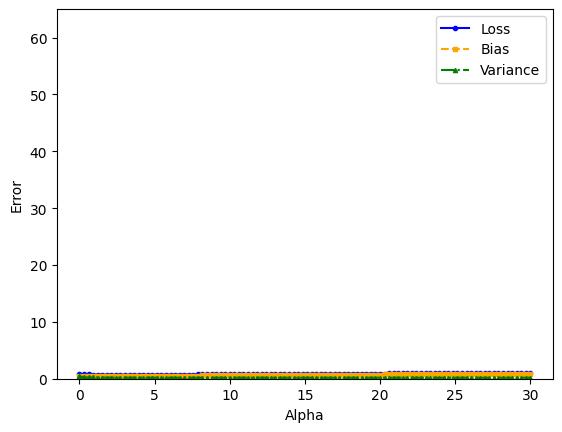

In [23]:
plt.plot(alphas, loss, label='Loss', color='blue', linestyle='-', marker='o', markersize=3)
plt.plot(alphas, bias, label='Bias', color='orange', linestyle='--', marker='s', markersize=3)
plt.plot(alphas, variance, label='Variance', color='green', linestyle='-.', marker='^', markersize=3)

plt.ylim(0, 65)
plt.xlabel('Alpha')
plt.ylabel('Error')
plt.legend() 
plt.show()


In [24]:
# if value of 'alpha' is too small(closed to zero),toh hmara 'bias' decrease krega and,'variance' bd jayega. (bcz of 'over-fitting')
# if value of 'alpha' is large after a specific point, toh hmara 'bias' bdne lgega and,'variance' ghtne lgega. (bcz of 'under-fitting')

# for finding the better value of 'alpha', jo intersecting points hai, uske thoda phle ka points lena chahiye...
# (where 'bias' thoda niche ho, and 'variance' uske aaspaas hai) whi regions ka point hm lenge.  

<h2> 4. Effect of Regularization on Loss Function</h2>

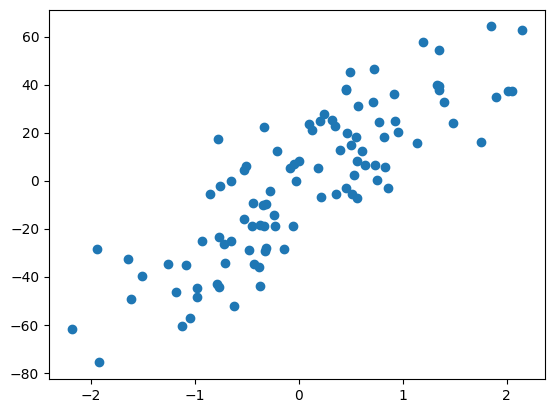

In [25]:
from sklearn.datasets import make_regression

X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=13) 

plt.scatter(X,y)

In [26]:
# apply 'linear_regression' on this

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X,y)

print(reg.intercept_)
print(reg.coef_)

-2.29474455867698
[27.82809103]


In [27]:
# look into the "NOTES" for better clarification :-

def cal_loss(m,alpha):
    return np.sum((y - m*X.ravel() + 2.29)**2) + alpha*m*m       # it gives the value of 'loss' --> L

In [28]:
def predict(m):
    return m*X - 2.29

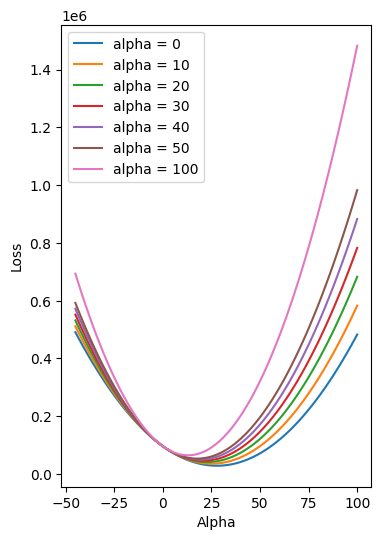

In [29]:
m = np.linspace(-45,100,100)
plt.figure(figsize=(4,6))

for j in [0,10,20,30,40,50,100]:

    loss = []
    for i in range(m.shape[0]):

        loss_i = cal_loss(m[i], j)
        loss.append(loss_i) 
    plt.plot(m,loss,label='alpha = {}'.format(j))
plt.legend()
plt.xlabel('Alpha')
plt.ylabel('Loss')
plt.show()    

In [30]:
# As 'alpha' increases,'bias' curve goes up and,'variance' curve goes down.
# And, 'Loss(L)' (expected error) is U-shaped: first decreases ('variance' control helps),then increases again ('bias' dominates).  

<h2> 5. Why called Ridge ?</h2>

In [31]:
# it means why we called "Ridge_Regression" as "Ridge"

# we will discuss it in future after learning some concepts

<h2> => Some Practical Tips for Ridge-Regression</h2>

In [32]:
# hmlg ko 'Ridge_Regression' tb apply krna chahiye, jb we have [ no. of i/p columns >= 2]  
# don't use it for '1' i/p and '1' o/p column.


# It means that jitne jyada 'columns' honge,utne jyada 'coefficients' honge and utne hi jyada coefficients ko hmko 'regularize' krna hoga.
# that's why, we use "Ridge-Regression".      